In [ ]:
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # For data normalization
import matplotlib.pyplot as plt  # For plotting and visualization
import seaborn as sns  # For enhanced data visualization


In [ ]:
!pip install statsmodels


In [ ]:
data = pd.read_csv('/content/1701399_13.09_30.86_tdy-2022.csv', skiprows=2)

# Step 3: Initial data inspection
print(data.head()) # To Display the first few rows of the dataset
print(data.info())  # Summary of the dataset to understand its structure
print(data.describe())

   Year  Month  Day  Hour  Minute  Clearsky DHI  Clearsky DNI  Temperature  \
0  2013      1    1     0      30             0             0         18.9   
1  2013      1    1     1      30             0             0         18.0   
2  2013      1    1     2      30             0             0         17.2   
3  2013      1    1     3      30             0             0         14.1   
4  2013      1    1     4      30             0             0         13.5   

   Clearsky GHI  cloud fill flag  ...  Unnamed: 36  Unnamed: 37  Unnamed: 38  \
0             0                0  ...          NaN          NaN          NaN   
1             0                0  ...          NaN          NaN          NaN   
2             0                0  ...          NaN          NaN          NaN   
3             0                0  ...          NaN          NaN          NaN   
4             0                0  ...          NaN          NaN          NaN   

   Unnamed: 39  Unnamed: 40  Unnamed: 41  Unnamed:

In [ ]:
data_cleaned = data.drop(columns=[col for col in data.columns if 'Unnamed' in col])
data_cleaned['Year'] = 2013
print(data_cleaned['Year'].unique()) #uniques value should be 2013
print(data_cleaned.head())
print(data_cleaned.info())

[2013]
   Year  Month  Day  Hour  Minute  Clearsky DHI  Clearsky DNI  Temperature  \
0  2013      1    1     0      30             0             0         18.9   
1  2013      1    1     1      30             0             0         18.0   
2  2013      1    1     2      30             0             0         17.2   
3  2013      1    1     3      30             0             0         14.1   
4  2013      1    1     4      30             0             0         13.5   

   Clearsky GHI  cloud fill flag  ...  DNI  Fill Flag  GHI  Relative Humidity  \
0             0                0  ...    0          0    0              41.92   
1             0                0  ...    0          0    0              44.22   
2             0                0  ...    0          0    0              45.67   
3             0                0  ...    0          0    0              29.35   
4             0                0  ...    0          0    0              31.11   

   Solar Zenith Angle  Surface Albedo

In [ ]:
data_cleaned['Temp_Lag1'] = data_cleaned['Temperature'].shift(1)


In [ ]:
data_cleaned['Temp_MA3'] = data_cleaned['Temperature'].rolling(window=3).mean()

In [ ]:
scaler = StandardScaler()
data_cleaned[['Temperature', 'GHI']] = scaler.fit_transform(data_cleaned[['Temperature', 'GHI']])

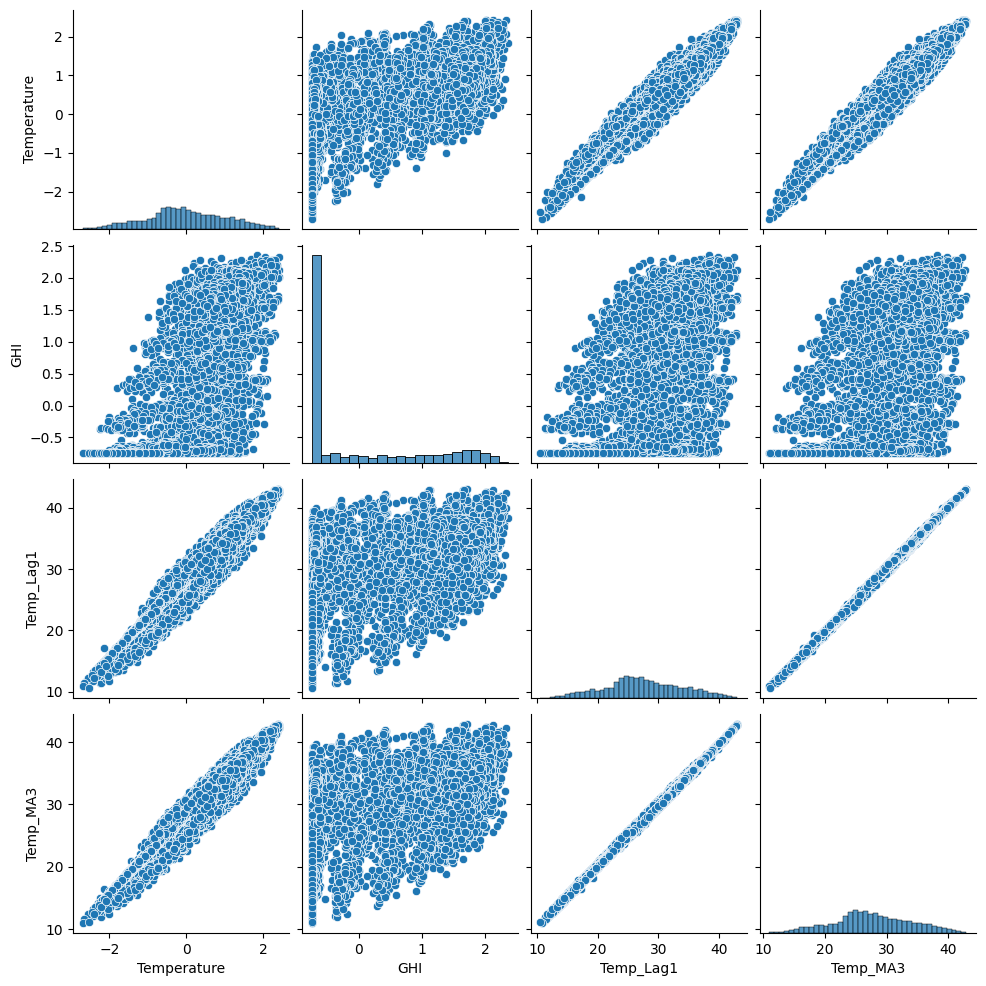

In [ ]:
sns.pairplot(data_cleaned[['Temperature', 'GHI', 'Temp_Lag1', 'Temp_MA3']])
plt.show()

Feature enginnering

Normalization of Data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_cleaned[['Temperature', 'GHI']] = scaler.fit_transform(data_cleaned[['Temperature', 'GHI']])


minmax scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
data_cleaned[['Temperature', 'GHI']] = min_max_scaler.fit_transform(data_cleaned[['Temperature', 'GHI']])

Data visvalization


pair plot

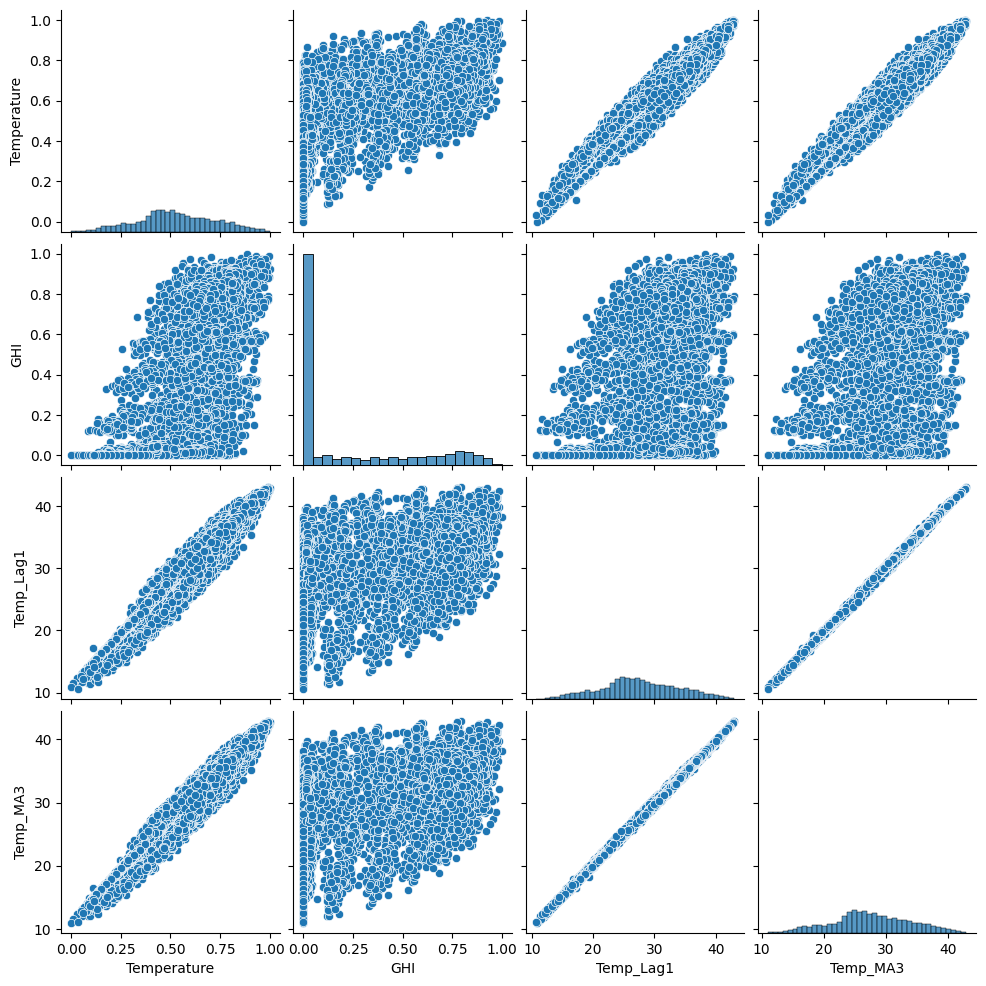

In [ ]:
import seaborn as sns
sns.pairplot(data_cleaned[['Temperature', 'GHI', 'Temp_Lag1', 'Temp_MA3']])
plt.show()


corelation heat map

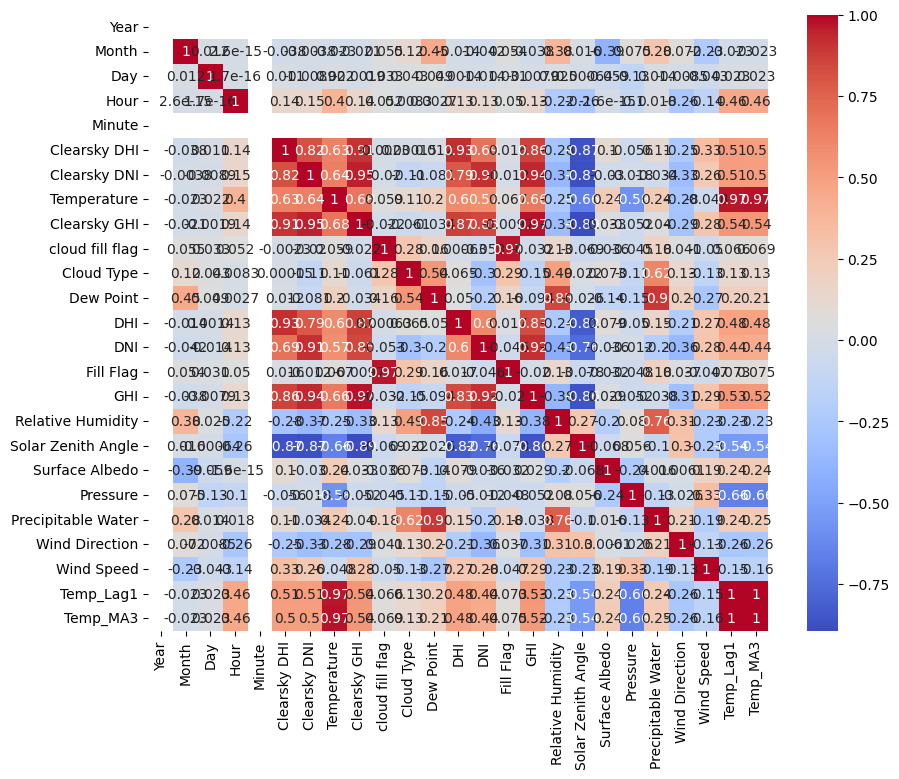

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_cleaned.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                8760 non-null   int64  
 1   Month               8760 non-null   int64  
 2   Day                 8760 non-null   int64  
 3   Hour                8760 non-null   int64  
 4   Minute              8760 non-null   int64  
 5   Clearsky DHI        8760 non-null   int64  
 6   Clearsky DNI        8760 non-null   int64  
 7   Temperature         8760 non-null   float64
 8   Clearsky GHI        8760 non-null   int64  
 9   cloud fill flag     8760 non-null   int64  
 10  Cloud Type          8760 non-null   int64  
 11  Dew Point           8760 non-null   float64
 12  DHI                 8760 non-null   int64  
 13  DNI                 8760 non-null   int64  
 14  Fill Flag           8760 non-null   int64  
 15  GHI                 8760 non-null   float64
 16  Relati

missing value handing and feature engineering

In [ ]:
df = data_cleaned.copy()
df

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Temperature,Clearsky GHI,cloud fill flag,...,GHI,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed,Temp_Lag1,Temp_MA3
0,2013,1,1,0,30,0,0,0.256173,0,0,...,0.0,41.92,165.44,0.32,958,1.4,349,4.1,NaN,NaN
1,2013,1,1,1,30,0,0,0.228395,0,0,...,0.0,44.22,169.46,0.32,958,1.5,344,4.1,18.9,NaN
2,2013,1,1,2,30,0,0,0.203704,0,0,...,0.0,45.67,159.63,0.32,957,1.5,339,4.0,18.0,18.033333
3,2013,1,1,3,30,0,0,0.108025,0,0,...,0.0,29.35,146.51,0.32,958,1.1,347,3.4,17.2,16.433333
4,2013,1,1,4,30,0,0,0.089506,0,0,...,0.0,31.11,132.82,0.32,958,1.1,347,3.4,14.1,14.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2013,12,31,19,30,0,0,0.388889,0,0,...,0.0,30.16,98.50,0.32,957,1.3,6,2.6,24.6,25.433333
8756,2013,12,31,20,30,0,0,0.370370,0,0,...,0.0,31.26,112.16,0.32,958,1.3,91,3.2,23.2,23.466667
8757,2013,12,31,21,30,0,0,0.345679,0,0,...,0.0,33.23,125.94,0.32,958,1.3,359,3.7,22.6,22.533333
8758,2013,12,31,22,30,0,0,0.317901,0,0,...,0.0,35.85,139.71,0.32,958,1.4,356,4.0,21.8,21.766667


In [ ]:
# df['Temp_Lag1'].fillna(method='ffill', inplace=True)
# df['Temp_MA3'].fillna(method='ffill', inplace=True)
# 2. Feature Engineering
# Create a 'Datetime' feature from Year, Month, Day, Hour, Minute
df['Datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour', 'Minute']])

# Create additional time-based features
df['DayOfYear'] = df['Datetime'].dt.dayofyear
df['WeekOfYear'] = df['Datetime'].dt.isocalendar().week
df['HourOfDay'] = df['Datetime'].dt.hour

# Drop original date and time columns (if no longer needed)
df.drop(['Year', 'Month', 'Day', 'Hour', 'Minute'], axis=1, inplace=True)

# Interaction features (e.g., between Solar Zenith Angle and GHI)
df['Zenith_GHI'] = df['Solar Zenith Angle'] * df['GHI']
df['Zenith_DNI'] = df['Solar Zenith Angle'] * df['DNI']

# Normalize/Standardize relevant features
from sklearn.preprocessing import StandardScaler

features_to_scale = ['Temperature', 'GHI', 'DHI', 'DNI',
                     'Relative Humidity', 'Solar Zenith Angle',
                     'Surface Albedo', 'Pressure', 'Precipitable Water',
                     'Wind Speed', 'Temp_Lag1', 'Temp_MA3']

scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Check the resulting DataFrame
print(df.head())

   Clearsky DHI  Clearsky DNI  Temperature  Clearsky GHI  cloud fill flag  \
0             0             0    -1.384421             0                0   
1             0             0    -1.526893             0                0   
2             0             0    -1.653536             0                0   
3             0             0    -2.144274             0                0   
4             0             0    -2.239256             0                0   

   Cloud Type  Dew Point       DHI       DNI  Fill Flag  ...  Wind Direction  \
0           0        5.7 -0.747517 -0.717787          0  ...             349   
1           0        5.6 -0.747517 -0.717787          0  ...             344   
2           0        5.4 -0.747517 -0.717787          0  ...             339   
3           0       -3.5 -0.747517 -0.717787          0  ...             347   
4           0       -3.3 -0.747517 -0.717787          0  ...             347   

   Wind Speed  Temp_Lag1  Temp_MA3            Datetime  

Data spliting

In [ ]:
# Assuming 'df' is your DataFrame and you want to predict solar power (e.g., 'GHI')

# Define the split ratios
train_size = int(len(df) * 0.7)
val_size = int(len(df) * 0.15)

# Split the data
train_data = df.iloc[:train_size]
val_data = df.iloc[train_size:train_size + val_size]
test_data = df.iloc[train_size + val_size:]

# Separate features and target variable (assuming target is 'GHI')
X_train = train_data.drop('GHI', axis=1)
y_train = train_data['GHI']
X_val = val_data.drop('GHI', axis=1)
y_val = val_data['GHI']
X_test = test_data.drop('GHI', axis=1)
y_test = test_data['GHI']

# Check the shapes of the splits
print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Validation data shape: {X_val.shape}, {y_val.shape}")
print(f"Test data shape: {X_test.shape}, {y_test.shape}")


Training data shape: (6132, 25), (6132,)
Validation data shape: (1314, 25), (1314,)
Test data shape: (1314, 25), (1314,)


## **Time Series Considerations:**
Ensure that time series splitting respects the order of data.
*   **No Shuffling**: Maintain the original order to avoid data  leakage and to reflect real-world prediction scenarios.
* **Temporal Validation**: Use the validation set to tune hyperparameters and the test set to evaluate final performance.



ARIMA AND SARIMA MODELS

arima

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Define ARIMA parameters (p, d, q)
p = 1  # AutoRegressive order
d = 1  # Differencing order
q = 1  # Moving Average order

# Fit ARIMA model
arima_model = ARIMA(y_train, order=(p, d, q))
arima_results = arima_model.fit()

# Print model summary
print(arima_results.summary())


                               SARIMAX Results                                
Dep. Variable:                    GHI   No. Observations:                 6132
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1207.274
Date:                Thu, 15 Aug 2024   AIC                           2420.547
Time:                        23:41:20   BIC                           2440.710
Sample:                             0   HQIC                          2427.542
                               - 6132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6906      0.012     55.416      0.000       0.666       0.715
ma.L1         -0.1045      0.012     -8.549      0.000      -0.128      -0.081
sigma2         0.0868      0.001    114.657      0.0

In [ ]:
# Check data types
# print(y_train.dtypes)
# print(X_train.dtypes)
X_train = X_train.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, replace non-convertibles with NaN
y_train = pd.to_numeric(y_train, errors='coerce')
# Check for non-numeric values
# print(y_train.head())
# print(X_train.head())


sarima

In [ ]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# p = 1  # AutoRegressive order
# d = 1  # Differencing order
# q = 1  # Moving Average order
# P = 1  # Seasonal AutoRegressive order
# D = 1  # Seasonal Differencing order
# Q = 1  # Seasonal Moving Average order
# s = 24  # Seasonal cycle length (e.g., hourly data with daily seasonality)
# # Example for SARIMA
# sarima_model = SARIMAX(y_train, exog=X_train, order=(p,d,q), seasonal_order=(P,D,Q,s))
# sarima_results = sarima_model.fit()
# print(sarima_results.summary())

# forecast = sarima_results.get_forecast(steps=len(y_val), exog=X_val)
# forecast_mean = forecast.predicted_mean
# forecast_errors = mean_squared_error(y_val, forecast_mean)
# print(f"Forecast Mean Squared Error: {forecast_errors}")


## **Model building**

random forest and xgboost

In [ ]:
X_train.head()

,Clearsky DHI,Clearsky DNI,Temperature,Clearsky GHI,cloud fill flag,Cloud Type,Dew Point,DHI,DNI,Fill Flag,...,Wind Direction,Wind Speed,Temp_Lag1,Temp_MA3,Datetime,DayOfYear,WeekOfYear,HourOfDay,Zenith_GHI,Zenith_DNI
0,0,0,-1.384421,0,0,0,5.7,-0.747517,-0.717787,0,...,349,0.706594,NaN,NaN,1357000200000000000,1,1,0,0.0,0.0
1,0,0,-1.526893,0,0,0,5.6,-0.747517,-0.717787,0,...,344,0.706594,-1.384601,NaN,1357003800000000000,1,1,1,0.0,0.0
2,0,0,-1.653536,0,0,0,5.4,-0.747517,-0.717787,0,...,339,0.635841,-1.527077,-1.552204,1357007400000000000,1,1,2,0.0,0.0
3,0,0,-2.144274,0,0,0,-3.5,-0.747517,-0.717787,0,...,347,0.211322,-1.653723,-1.810530,1357011000000000000,1,1,3,0.0,0.0
4,0,0,-2.239256,0,0,0,-3.3,-0.747517,-0.717787,0,...,347,0.211322,-2.144476,-2.052710,1357014600000000000,1,1,4,0.0,0.0


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Example for Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_val)

# Example for XGBoost
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_val)


In [ ]:
from sklearn.model_selection import train_test_split

# Example: Splitting data into training and testing sets
X = data_cleaned[['Temperature']]
y = data_cleaned['GHI']  # Replace with your actual target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple model, e.g., Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 0.057058201587926446
